# Imports

In [1]:
from env import user, password, host

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import acquire
import prepare

# Acquire Data

In [2]:
telco = acquire.get_telco_data()

In [3]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


# Prepare

## Split Data into train, test, validate
Random seed has been set to 123 and train size for the train size is set at .8 for both the train test split and the validate split.

## Clean the Data

- Surprisingly, it looks like we don't have any nulls within the data
- We can patch out the type id's, since they were only useful for merging
    * We could've also done this in SQL, but I prefer getting to python as soon as possible
- Fields to look at:
    * gender: Currently an object, likely needs to be encoded
    * senior_citizen: It's an int type, does that mean it's encoded already?
    * partner: I have no clue what this field is for
    * dependents: Currently an object, either it's a bool or should be an int identifying how many dependents
    * phone_service - paperless_billing: Needs to be encoded
    * total_charges: Definitely should not be an object, likely needs to be a float
    * churn: Probably needs to be encoded

In [4]:
train, test, validate = prepare.prep_telco(telco, .8, 123)

In [5]:
train.sample(4)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
1416,3468-DRVQJ,Female,0,Yes,Yes,10,Yes,Yes,Yes,Yes,...,No,Yes,No,No,70.30,676.15,No,One year,DSL,Electronic check
5452,8606-CIQUL,Male,1,Yes,Yes,72,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,115.75,8399.15,No,Two year,Fiber optic,Credit card (automatic)
3631,5536-SLHPM,Female,0,Yes,No,55,Yes,Yes,No,No,...,No,No,No,Yes,77.75,4458.15,Yes,Month-to-month,Fiber optic,Electronic check
5598,1552-TKMXS,Female,0,Yes,No,42,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,20.35,869.90,No,Month-to-month,None,Credit card (automatic)


In [6]:
print(train.shape)
print(test.shape)
print(validate.shape)

(4507, 21)
(1409, 21)
(1127, 21)


In [7]:
train.dtypes

customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges            float64
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [8]:
train.churn.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
train.contract_type.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [10]:
# encoder = LabelEncoder()
# encoder.fit(train.contract_type)
# train["contract_type_encoded"] = encoder.transform(train.contract_type)
# test["contract_type_encoded"] = encoder.transform(test.contract_type)
# validate["contract_type_encoded"] = encoder.transform(validate.contract_type)

In [11]:
def encode_contract_types(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.contract_type)
    train["contract_type_encoded"] = encoder.transform(train.contract_type)
    test["contract_type_encoded"] = encoder.transform(test.contract_type)
    validate["contract_type_encoded"] = encoder.transform(validate.contract_type)
    return encoder, train, test, validate

In [12]:
def encode_internet_service_types(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.internet_service_type)
    train["encoded_internet_service_type"] = encoder.transform(train.internet_service_type)
    test["encoded__service_type"] = encoder.transform(test.internet_service_type)
    validate["encoded__service_type"] = encoder.transform(validate.internet_service_type)
    return encoder, train, test, validate

In [13]:
def encode_payment_types(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.payment_type)
    train["payment_type_encoded"] = encoder.transform(train.payment_type)
    test["payment_type_encoded"] = encoder.transform(test.payment_type)
    validate["payment_type_encoded"] = encoder.transform(validate.payment_type)
    return encoder, train, test, validate

In [14]:
def encode_churn(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.churn)
    train["churn_encoded"] = encoder.transform(train.churn)
    test["churn_encoded"] = encoder.transform(test.churn)
    validate["churn_encoded"] = encoder.transform(validate.churn)
    return encoder, train, test, validate

In [15]:
def encoded_df(train, test, validate):
    encoder_1, train, test, validate = encode_contract_types(train, test, validate)
    encoder_2, train, test, validate = encode_internet_service_types(train, test, validate)
    encoder_3, train, test, validate = encode_churn(train, test, validate)
    encoder_4, train, test, validate = encode_payment_types(train, test, validate)
    return encoder_1, encoder_2, encoder_3, encoder_3, train, test, validate

In [16]:
encoder_1, encoder_2, encoder_3, encoder_4, train, test, validate = encoded_df(train, test, validate)

In [17]:
train.sample(4)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type_encoded,encoded_internet_service_type,churn_encoded,payment_type_encoded
2369,9227-YBAXE,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,82.50,5215.10,No,Two year,DSL,Bank transfer (automatic),2,0,0,0
1868,1187-WILMM,Male,0,Yes,Yes,63,Yes,Yes,Yes,Yes,...,89.40,5597.65,No,Two year,DSL,Credit card (automatic),2,0,0,1
2972,2672-HUYVI,Female,0,No,No,6,Yes,No,No,No,...,91.10,455.30,Yes,Month-to-month,Fiber optic,Electronic check,0,1,1,2
3707,5921-NGYRH,Male,0,Yes,No,64,Yes,No,Yes,No,...,73.55,4764.00,No,Month-to-month,Fiber optic,Mailed check,0,1,0,3


In [18]:
print(train.shape)
print(test.shape)
print(validate.shape)

(4507, 25)
(1409, 25)
(1127, 25)


# Feature Engineering

In [19]:
train["tenure_years"] = (train.tenure / 12).round()

# Explore

Our positive is churning and negative is not churning

- Look at groupings of customers who are churning and are not churning

- **Hypothesis**: Customers who are month to month are more likely to churn and churn rates go down as contract type goes up

In [45]:
df_plot = train.groupby('tenure').churn_encoded.mean().reset_index()

In [47]:
df_plot

,tenure,churn_encoded
0,0,0.000000
1,1,0.602978
2,2,0.490909
3,3,0.447761
4,4,0.461538
...,...,...
68,68,0.092308
69,69,0.111111
70,70,0.050633
71,71,0.026786


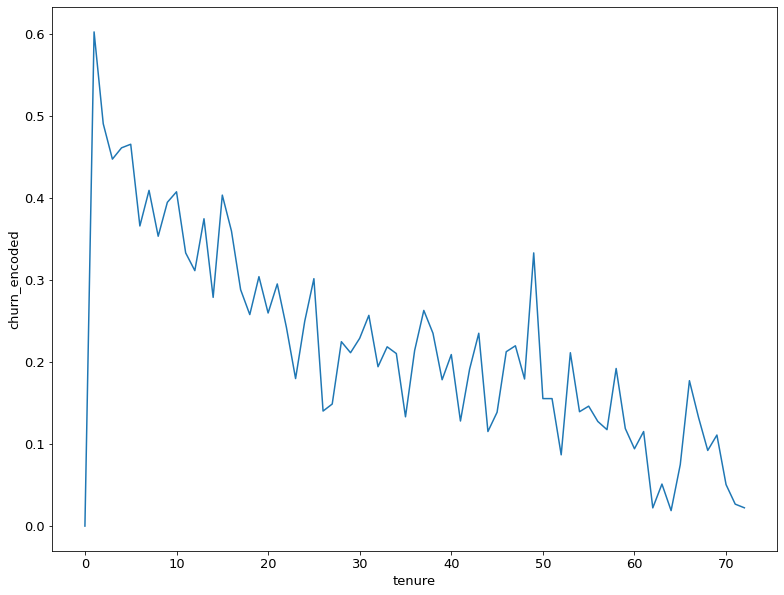

In [48]:
sns.lineplot(df_plot.tenure, df_plot.churn_encoded)

## Correlation heatmap

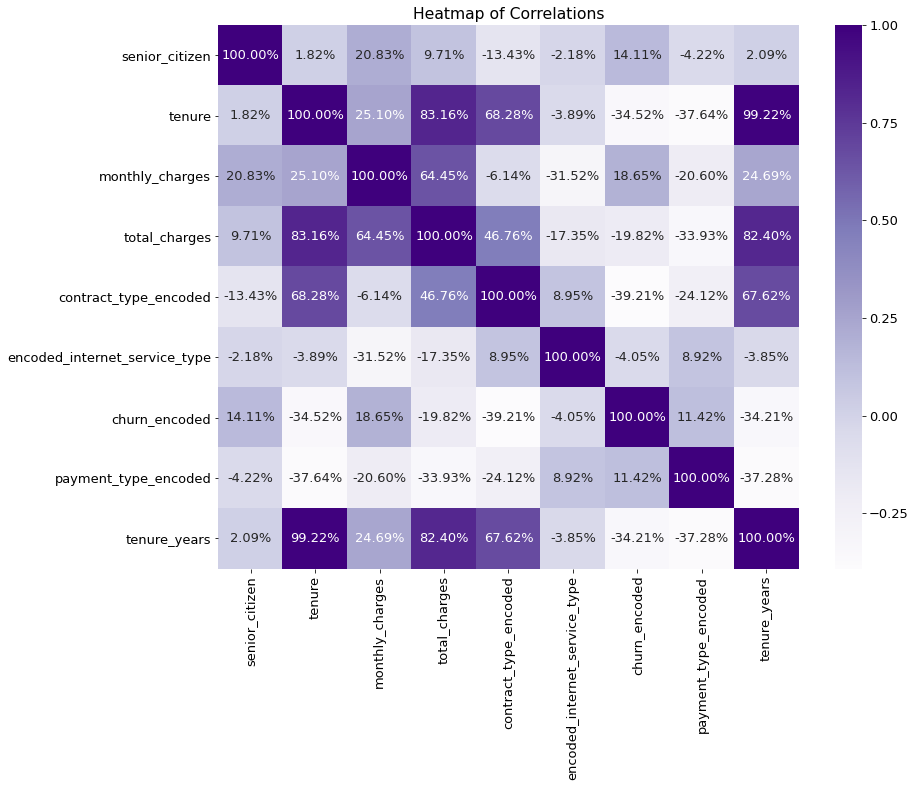

In [20]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=13)
plt.title("Heatmap of Correlations")
sns.heatmap(train.corr(), annot=True, cmap='Purples', fmt='.2%')

## Contract Types

In [21]:
ctab = pd.crosstab(train.churn, train.contract_type)

In [22]:
ctab

contract_type,Month-to-month,One year,Two year
churn,,,
No,1432,826,1046
Yes,1062,108,33


In [23]:
ctab = pd.crosstab(train.churn, train.contract_type, normalize=True)

In [24]:
ctab

contract_type,Month-to-month,One year,Two year
churn,,,
No,0.317728,0.183270,0.232083
Yes,0.235633,0.023963,0.007322


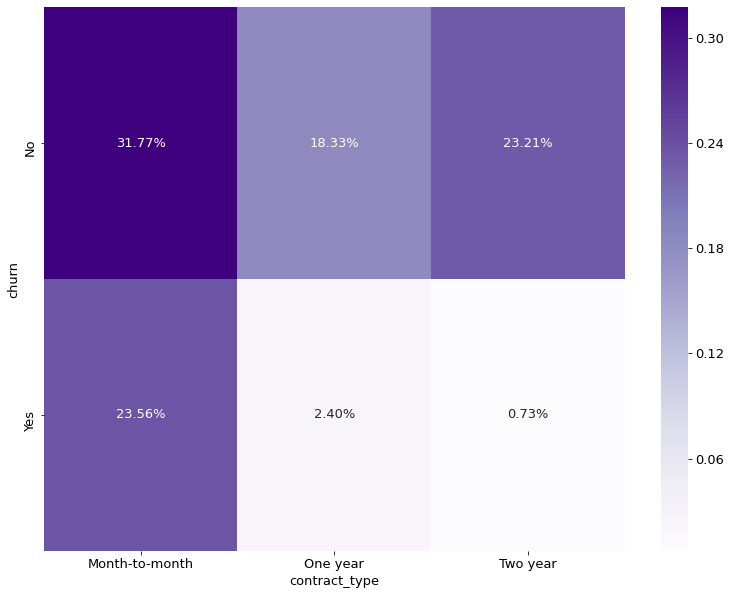

In [25]:
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.2%')

<function matplotlib.pyplot.show(*args, **kw)>

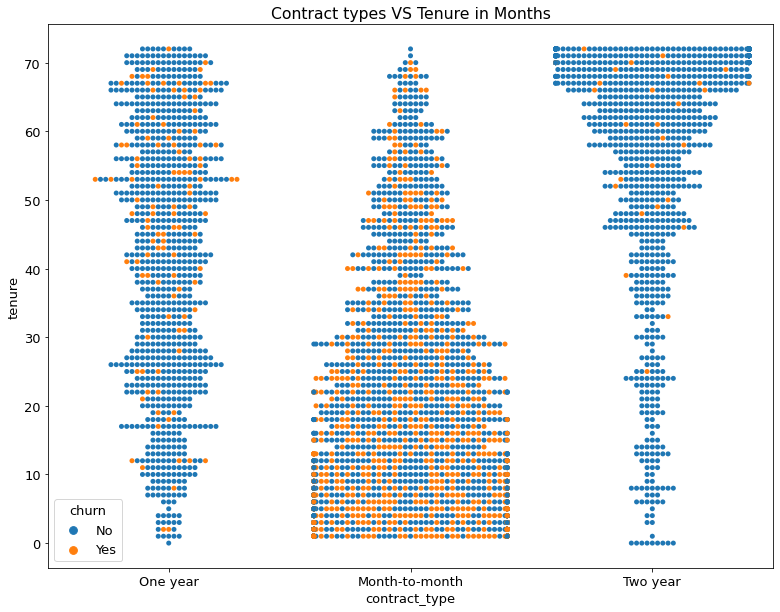

In [26]:
plt.title("Contract types VS Tenure in Months")
sns.swarmplot(x="contract_type", y="tenure", data=train, hue="churn")

plt.show

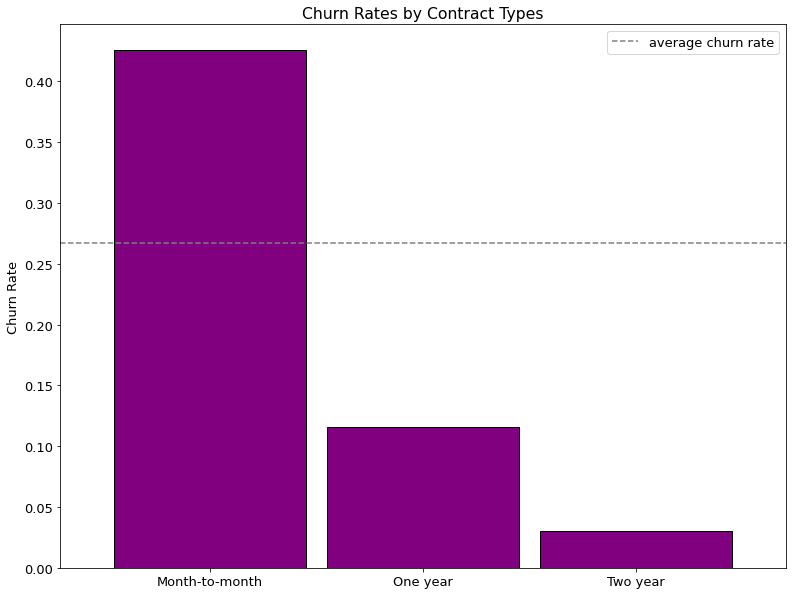

In [27]:
plt.title("Churn Rates by Contract Types")
train.groupby("contract_type").churn_encoded.mean().plot.bar(ec='black', fc='purple', width=.9, label='')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Churn Rate')
plt.hlines(train.churn_encoded.mean(), *plt.xlim(), ls='--', color='grey', label='average churn rate')
plt.legend()

## Churn Rates by Payment type

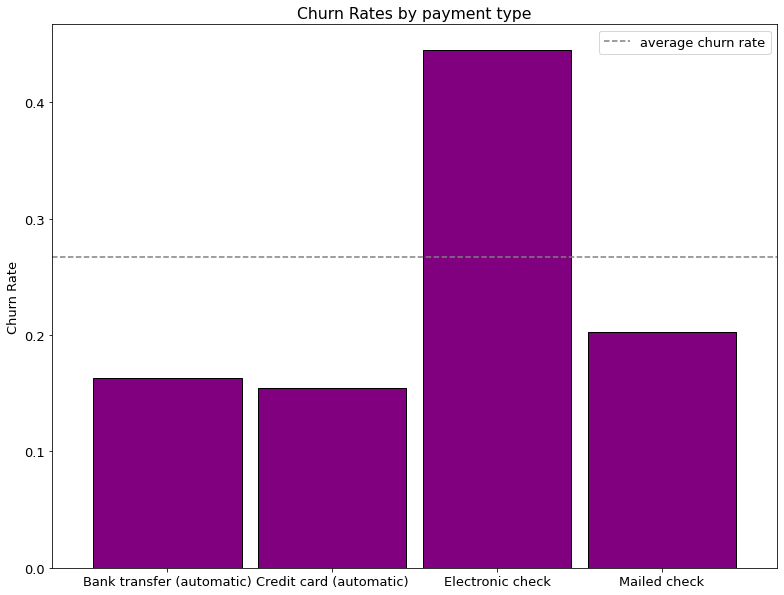

In [28]:
plt.title("Churn Rates by payment type")
train.groupby("payment_type").churn_encoded.mean().plot.bar(ec='black', fc='purple', width=.9, label='')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Churn Rate')
plt.hlines(train.churn_encoded.mean(), *plt.xlim(), ls='--', color='grey', label='average churn rate')
plt.legend()

## Churn Rates by Internet service type and phone

<function matplotlib.pyplot.show(*args, **kw)>

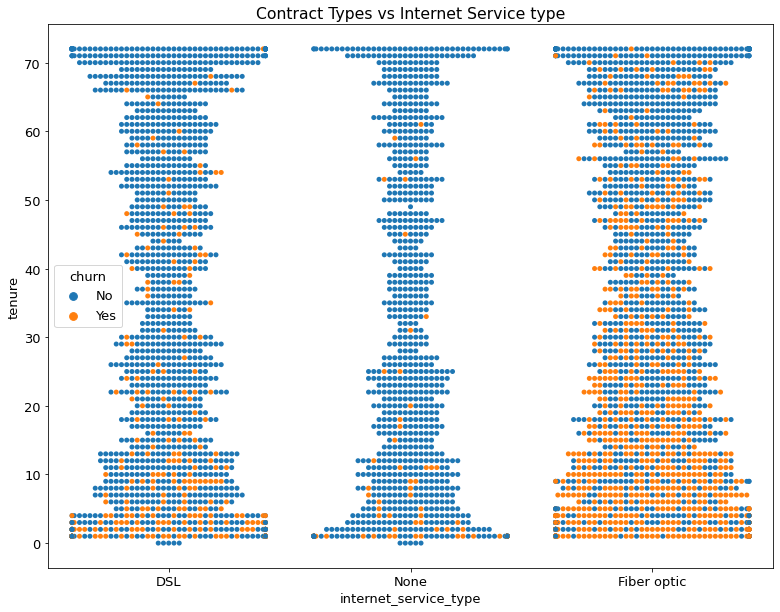

In [31]:
plt.title("Contract Types vs Internet Service type")
sns.swarmplot(x="internet_service_type", y="tenure", data=train, hue="churn")

plt.show

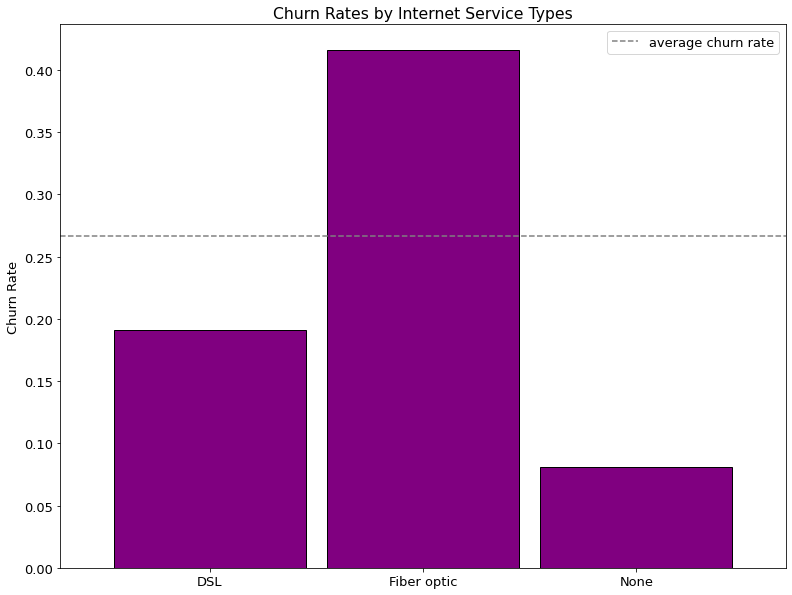

In [33]:
plt.title("Churn Rates by Internet Service Types")
train.groupby("internet_service_type").churn_encoded.mean().plot.bar(ec='black', fc='purple', width=.9, label='')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Churn Rate')
plt.hlines(train.churn_encoded.mean(), *plt.xlim(), ls='--', color='grey', label='average churn rate')
plt.legend()

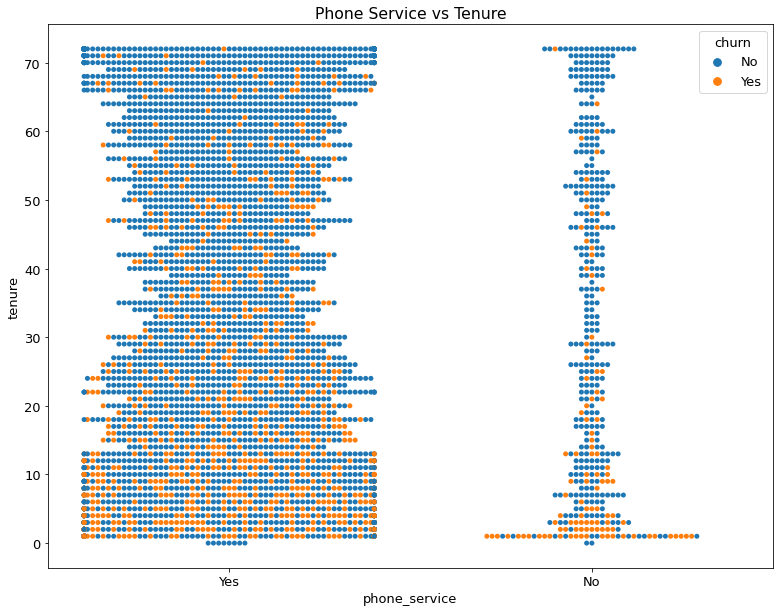

In [32]:
plt.title("Phone Service vs Tenure")
sns.swarmplot(x="phone_service", y="tenure", data=train, hue="churn")

Takeaways:
   - Fiber Optics is more likely to churn - this is surprising
   - No Internet is least likely to churn
   - for DSL and No Internet the longer they are customers they less likely they are to churn
   
Next Steps:
 - 

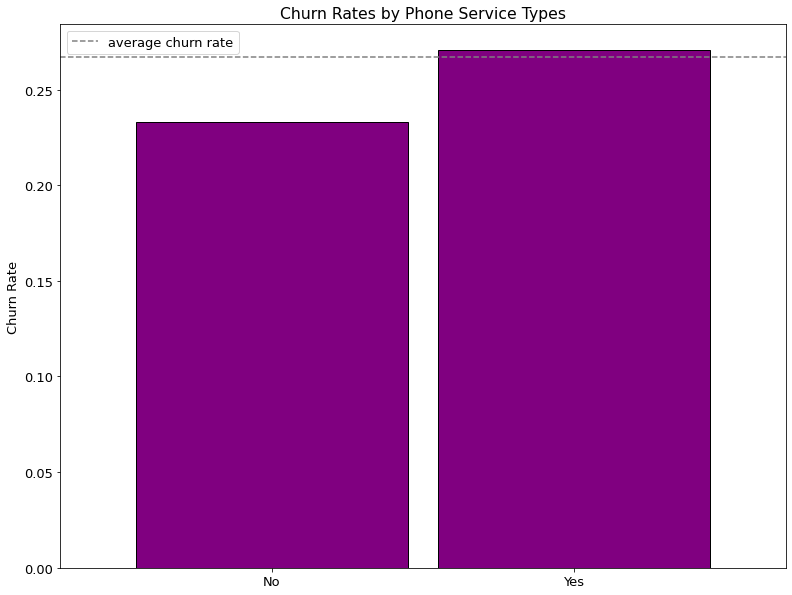

In [35]:
plt.title("Churn Rates by Phone Service Types")
train.groupby("phone_service").churn_encoded.mean().plot.bar(ec='black', fc='purple', width=.9, label='')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Churn Rate')
plt.hlines(train.churn_encoded.mean(), *plt.xlim(), ls='--', color='grey', label='average churn rate')
plt.legend()

## Takeaways

Takeaways: 
   - Month to Month customers are churning a lot more than the other contract types and are above the mean average
   - Two year seem to be churning after the roughly the 25 month marker
   - One Year seems evenly distributed in regards to churning
   - customers with phone service are are churning slightly more than the average churn rate
   
    
Next steps:
   - Take a look at the distribution of monthly charges per contract type
   - Types of service per contract
   - Age distribution per contract
   - payment type per contract
    
